In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [63]:
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from pylab import rcParams
import sklearn
from sklearn import preprocessing

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score

In [65]:
%matplotlib inline
rcParams['figure.figsize']= 5,4
sb.set_style('whitegrid')

In [66]:
titanic_training =pd.read_csv('../input/titanic/train.csv')

titanic_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
print(titanic_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


**We can see that there are many empty cells in the dataset**

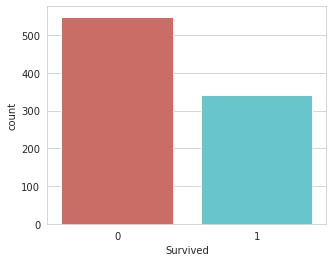

In [68]:
sb.countplot(x="Survived",data = titanic_training,palette ='hls')

**The number of deaths are more than survivors**

In [69]:
titanic_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**There are 177 null values in 'Age', 687 null values in 'Cabin' and 2 null values in embarked**

In [70]:
titanic_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
titanic_training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [72]:
titanic_data = titanic_training.drop(['Name','Ticket','Cabin'],axis =1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


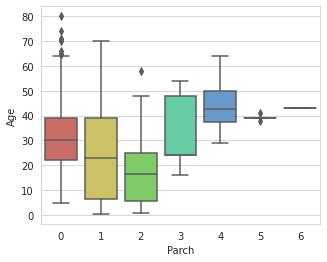

In [73]:
sb.boxplot(x='Parch',y='Age',data = titanic_data,palette = 'hls')

In [74]:
parch_group = titanic_data.groupby(titanic_data['Parch'])
pd.DataFrame(parch_group)

,0,1
0,0,PassengerId Survived Pclass Sex A...
1,1,PassengerId Survived Pclass Sex A...
2,2,PassengerId Survived Pclass Sex A...
3,3,PassengerId Survived Pclass Sex A...
4,4,PassengerId Survived Pclass Sex A...
5,5,PassengerId Survived Pclass Sex A...
6,6,PassengerId Survived Pclass Sex A...


In [75]:
parch_group.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


**We can understand the mean age under each Parch. Lets create a function to assign mean of the age to each parch and apply on Age column in titanic_data to get rid of the large number of missing values**

In [76]:
def age_approx(cols):
    Age = cols[0]
    Parch =cols[1]
    if pd.isnull(Age):
        if Parch == 0:
            return 32
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 44
        elif Parch == 5:
            return 39
        elif Parch == 6:
            return 43
        else:
            return 30
    else:
        return Age

In [77]:
titanic_data['Age'] = titanic_data[['Age','Parch']].apply(age_approx,axis = 1)
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

 **We filled all the empty age cells.Lets drop all the other empty cells 

In [78]:
titanic_data.dropna(inplace = True)
titanic_data.reset_index(inplace = True,drop = True)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


In [79]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = titanic_data['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [81]:
gender_df= pd.DataFrame(gender_encoded,columns = ['Male_gender'])
gender_df.head()

,Male_gender
0,1
1,0
2,0
3,0
4,1


**Here we converted the categorical variables into dummy indicators . Now lets convert the embarked column **

In [82]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [83]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories = 'auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat =embarked_1hot.toarray()
embarked_df = pd.DataFrame(embarked_1hot_mat,columns = ['C','Q','S'])
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


**What one hot encoding does is, it takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value**

In [85]:
titanic_data.drop(['Sex','Embarked'],inplace = True,axis = 1)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [86]:
titanic_dmy = pd.concat([titanic_data,gender_df,embarked_df],verify_integrity = True,axis =1).astype(float)
titanic_dmy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


**Concatenated the dataframes we created to the training set**

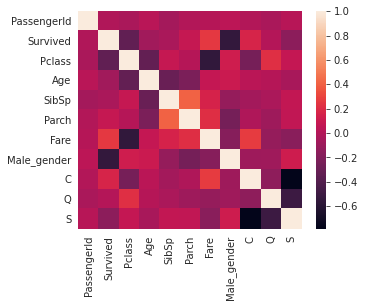

In [87]:
sb.heatmap(titanic_dmy.corr())

**Checking for independancy between features**

In [88]:
titanic_dmy.drop(['Pclass','Fare'],axis =1,inplace = True)
titanic_dmy.head()

,PassengerId,Survived,Age,SibSp,Parch,Male_gender,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [89]:
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   Male_gender  889 non-null    float64
 6   C            889 non-null    float64
 7   Q            889 non-null    float64
 8   S            889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


In [90]:
X_train,X_test,y_train,y_test = train_test_split(titanic_dmy.drop(['Survived'],axis=1),
                                                 titanic_dmy['Survived'],test_size =0.2,random_state =200)

**Breaking into training and testing set.X is all the columns except survived and y is the column of survived**

In [91]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(711, 8) (711,) (178, 8) (178,)


In [92]:
pd.DataFrame(X_train)

,PassengerId,Age,SibSp,Parch,Male_gender,C,Q,S
719,721.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0
165,167.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
879,882.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0
451,453.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
181,183.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
810,812.0,39.0,0.0,0.0,1.0,0.0,0.0,1.0
836,839.0,32.0,0.0,0.0,1.0,0.0,0.0,1.0
784,786.0,25.0,0.0,0.0,1.0,0.0,0.0,1.0
617,619.0,4.0,2.0,1.0,0.0,0.0,0.0,1.0


In [93]:
pd.DataFrame(y_train)

,Survived
719,1.0
165,1.0
879,0.0
451,0.0
181,0.0
...,...
810,0.0
836,1.0
784,0.0
617,1.0


In [95]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [96]:
y_pred = logreg.predict(X_test)

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [98]:
y_train_pred = cross_val_predict(logreg,X_train,y_train,cv = 5)
confusion_matrix(y_train,y_train_pred)

array([[377,  63],
       [ 91, 180]])

In [99]:
precision_score(y_train,y_train_pred)

0.7407407407407407

In [100]:
titanic_dmy[863:864]

,PassengerId,Survived,Age,SibSp,Parch,Male_gender,C,Q,S
863,866.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


In [104]:
test_passenger = np.array([866,42,0,0,0,0,0,1]).reshape(1,-1)
print(logreg.predict(test_passenger))
print(logreg.predict_proba(test_passenger))

[1.]
[[0.26657994 0.73342006]]


**This explains that the given passenger is 26 % dead and 73 % alive**

In [105]:
titanic_dmy[364:365]

,PassengerId,Survived,Age,SibSp,Parch,Male_gender,C,Q,S
364,366.0,0.0,30.0,0.0,0.0,1.0,0.0,0.0,1.0


In [106]:
test_passenger_2 = np.array([366,30,0,0,1,0,0,1]).reshape(1,-1)
print(logreg.predict(test_passenger_2))
print(logreg.predict_proba(test_passenger_2))

[0.]
[[0.79985926 0.20014074]]


**The passenger is 79.9 % dead and 20 % alive**